In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PWI','RPS','DCAP'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PWI','RPS','DCAP'],inplace=True)

matches.replace(to_replace = 'Bangalore',value = 'Bengaluru', inplace=True)
matches.replace(to_replace = 'DD',value = 'DCAP', inplace=True)
deliveries.replace(to_replace = 'DD',value = 'DCAP', inplace=True)

In [8]:
def drawbar(x):
    m = pd.DataFrame(matches[x].value_counts(ascending=False))
    fig=plt.figure(figsize=(14,8))
    ax=sns.barplot(y=m.index,x=m.iloc[:,0], data=m, palette='coolwarm')
    initialx=0
    for p in ax.patches:
        ax.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()))
        initialx+=1

Text(0.5, 1.0, 'Cities With Most Number of Games')

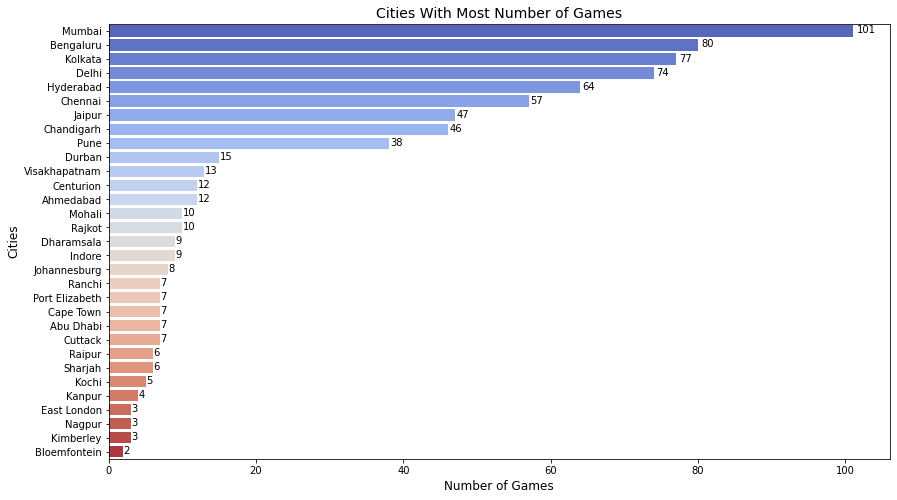

In [9]:
# fig=plt.figure(figsize=(14,8))
drawbar('city')
plt.xlabel('Number of Games', size=12)
plt.ylabel('Cities', size=12)
plt.title('Cities With Most Number of Games', size=14)

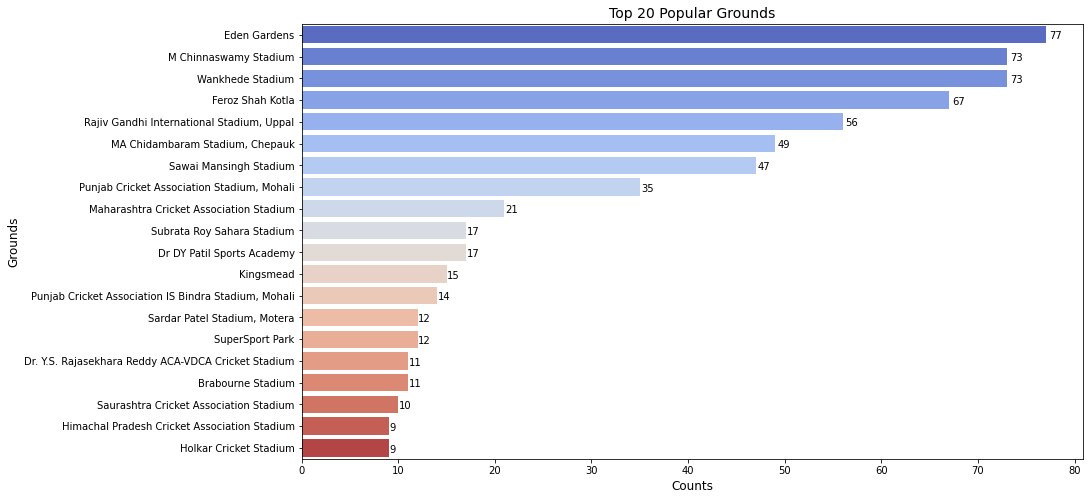

In [10]:
mvenue = pd.DataFrame(matches['venue'].value_counts(ascending=False))[:20]
fig=plt.figure(figsize=(14,8))
ax=sns.barplot(y=mvenue.index,x=mvenue.iloc[:,0], data=mvenue, palette='coolwarm')
initialx=0
plt.xlabel('Counts', size=12)
plt.ylabel('Grounds', size=12)
plt.title('Top 20 Popular Grounds', size=14)
for p in ax.patches:
    ax.text(p.get_width()*1.005,initialx+p.get_height()/4,'{:1.0f}'.format(p.get_width()))
    initialx+=1

Text(0.5, 1.0, 'Number of Toss Wins')

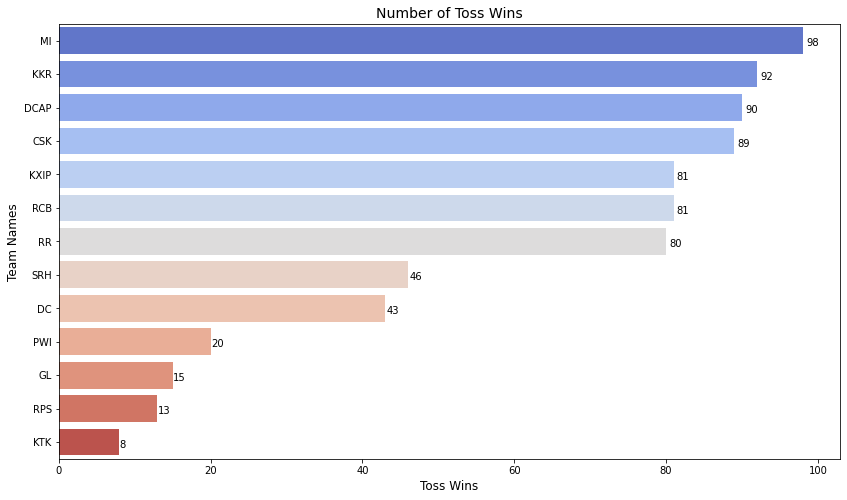

In [11]:
drawbar('toss_winner')
plt.xlabel('Toss Wins', size=12)
plt.ylabel('Team Names', size=12)
plt.title('Number of Toss Wins', size=14)

Text(0.5, 1.0, 'Toss Decisions By Seasons')

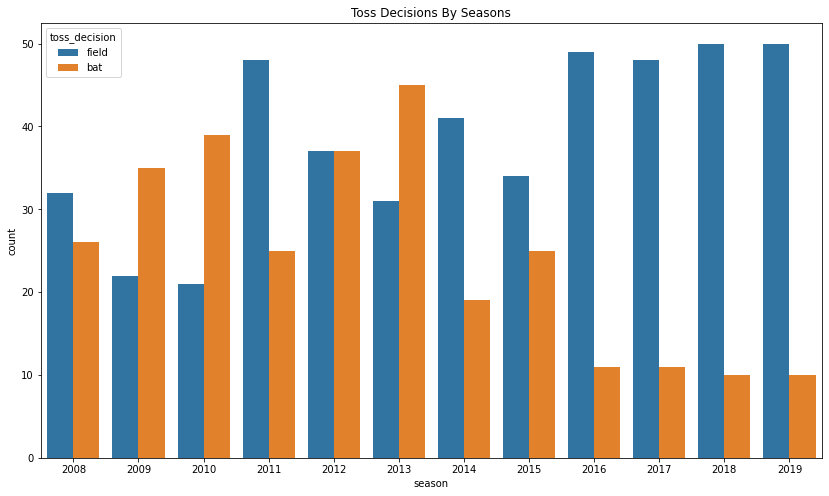

In [12]:
#From the past 4 seasons, teams are preferring to bowl first. We can check whether teams chasing first had a better success
# rate from seasons 2008 to 2015
fig=plt.figure(figsize=(14,8))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.title('Toss Decisions By Seasons')

Text(0.5, 1.0, 'Number of Victories')

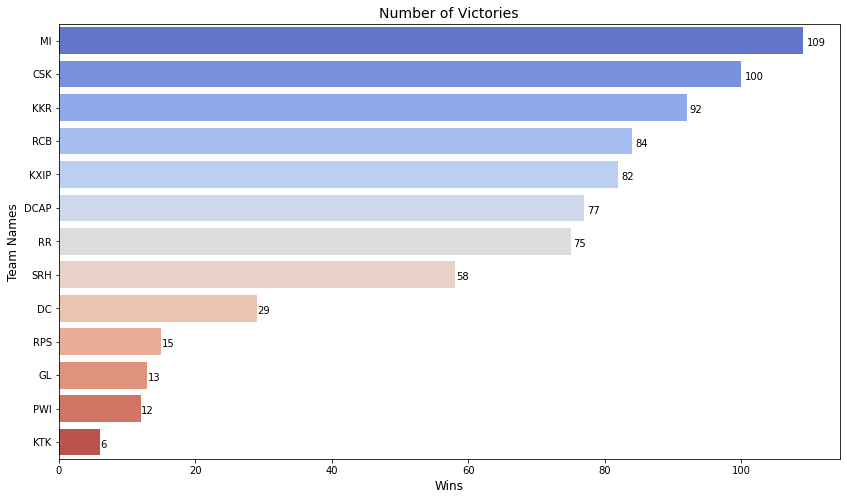

In [13]:
drawbar('winner')
plt.xlabel('Wins', size=12)
plt.ylabel('Team Names', size=12)
plt.title('Number of Victories', size=14)

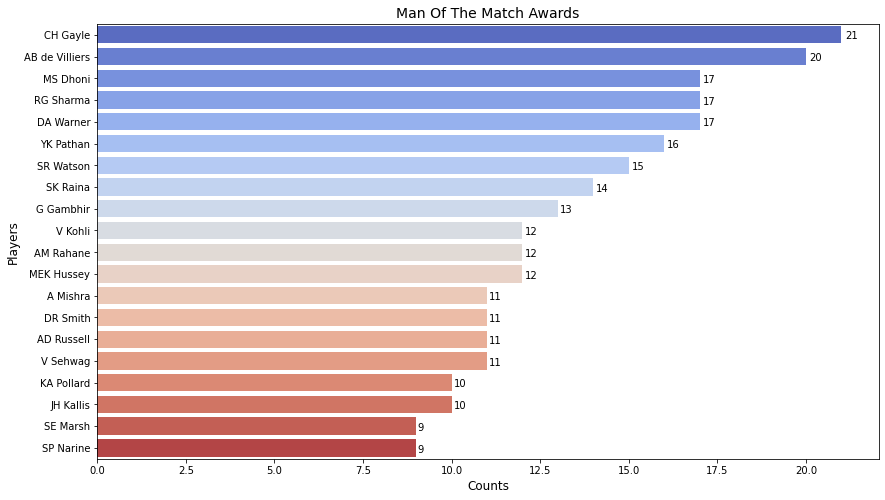

In [14]:
mplaofmat = pd.DataFrame(matches['player_of_match'].value_counts(ascending=False))[:20]
fig=plt.figure(figsize=(14,8))
ax=sns.barplot(y=mplaofmat.index,x=mplaofmat.iloc[:,0], data=mplaofmat, palette='coolwarm')
initialx=0
plt.xlabel('Counts', size=12)
plt.ylabel('Players', size=12)
plt.title('Man Of The Match Awards', size=14)
for p in ax.patches:
    ax.text(p.get_width()*1.005,initialx+p.get_height()/4,'{:1.0f}'.format(p.get_width()))
    initialx+=1

In [15]:
print('IPL matches have been played in',matches['city'].nunique(),'different cities and', matches['venue'].nunique(),'grounds with',matches['player_of_match'].nunique(),'unqiue players winning Man Of The Match Awards')

IPL matches have been played in 31 different cities and 41 grounds with 226 unqiue players winning Man Of The Match Awards


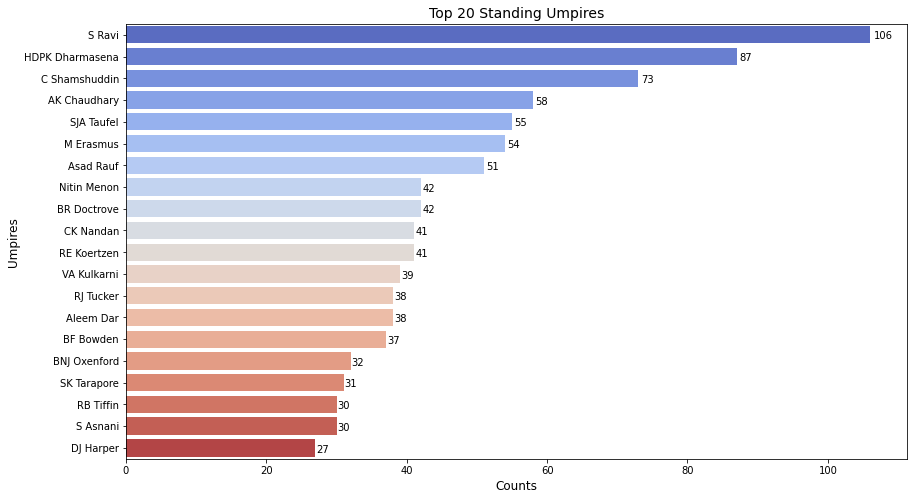

In [16]:
ump = pd.DataFrame(matches['umpire1'])
ump1 = pd.DataFrame(matches['umpire2']).rename(columns = {'umpire2':'umpire1'})
ump = ump.append(ump1, ignore_index=True)
ump = pd.DataFrame(ump['umpire1'].value_counts(ascending=False))[:20]
fig=plt.figure(figsize=(14,8))
ax=sns.barplot(y=ump.index,x=ump.iloc[:,0], data=ump, palette='coolwarm')
initialx=0
plt.xlabel('Counts', size=12)
plt.ylabel('Umpires', size=12)
plt.title('Top 20 Standing Umpires', size=14)
for p in ax.patches:
    ax.text(p.get_width()*1.005,initialx+p.get_height()/4,'{:1.0f}'.format(p.get_width()))
    initialx+=1

In [17]:
#MI beat DD by 146 runs in 2017 which is the biggest margin of victory by number of runs
matches[matches['win_by_runs'] == matches['win_by_runs'].max()][['season','city','date','team1','team2','toss_winner','player_of_match','win_by_runs']]

,season,city,date,team1,team2,toss_winner,player_of_match,win_by_runs
43,2017,Delhi,2017-05-06,MI,DCAP,DCAP,LMP Simmons,146


In [18]:
#RCB has won 3 games by 10 wickets(2010,2015,2018). They won the toss in all of those games
matches[matches['win_by_wickets'] == matches['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,2017-04-30,DCAP,KXIP,KXIP,field,normal,0,KXIP,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,2008-04-27,MI,DC,DC,field,normal,0,DC,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,2009-04-19,KXIP,DCAP,DCAP,field,normal,1,DCAP,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bengaluru,2010-03-18,RR,RCB,RCB,field,normal,0,RCB,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,2011-05-20,MI,RR,MI,bat,normal,0,RR,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,RR,MI,RR,bat,normal,0,MI,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,2013-04-10,KXIP,CSK,CSK,field,normal,0,CSK,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,DCAP,RCB,RCB,field,normal,0,RCB,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,2016-04-21,GL,SRH,SRH,field,normal,0,SRH,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


In [19]:
teamgames = pd.DataFrame(matches['team1'])
teamgames1 = pd.DataFrame(matches['team2']).rename(columns = {'team2':'team1'})
teamgames = teamgames.append(teamgames1, ignore_index=True)
teamgames = pd.DataFrame(teamgames['team1'].value_counts(ascending=False)).reset_index().rename(columns= {'index':'team','team1':'matches'})
teamwins = pd.DataFrame(matches['winner'].value_counts()).reset_index().rename(columns= {'index':'team','winner':'wins'})
teamwinper = pd.merge(teamgames,
                 teamwins,
                 on='team')
teamwinper['win%'] = (teamwinper['wins']/teamwinper['matches'])*100
teamwinper = teamwinper.sort_values(by='win%',ascending=False)
teamwinper['losses'] = teamwinper['matches'] - teamwinper['wins'] 
teamwinper['win%'] = teamwinper['win%'].round(decimals=1) 
teamwinper.head()

,team,matches,wins,win%,losses
5,CSK,164,100,61.0,64
0,MI,187,109,58.3,78
7,SRH,108,58,53.7,50
2,KKR,178,92,51.7,86
6,RR,147,75,51.0,72


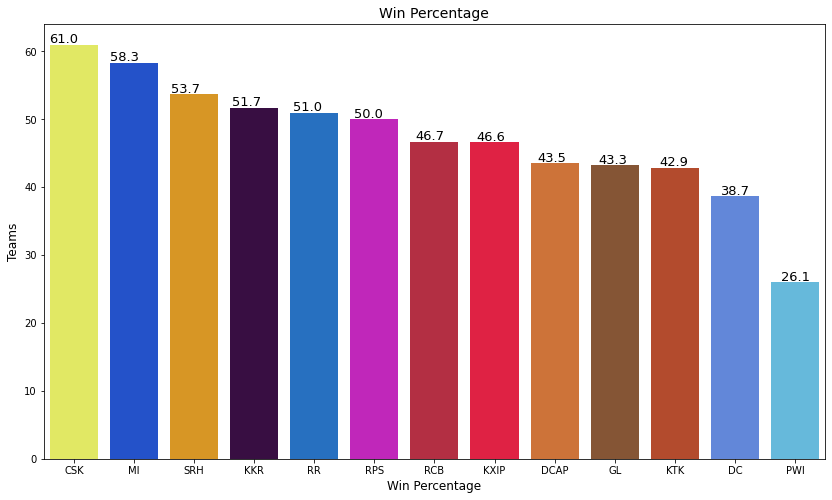

In [20]:
fig=plt.figure(figsize=(14,8))
clrs = ['#F4FE4E','#0846E4','#F59E07','#3D064A','#0E6FD9','#D90ED2','#C91934','#FF0230','#E66E20','#925228','#CA3E16','#4E7FED','#53C1EE']
ax=sns.barplot(x=teamwinper['team'],y=teamwinper.iloc[:,3], data=teamwinper, palette=clrs)
initialx=0
plt.xlabel('Win Percentage', size=12)
plt.ylabel('Teams', size=12)
plt.title('Win Percentage', size=14)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.005), size=13)

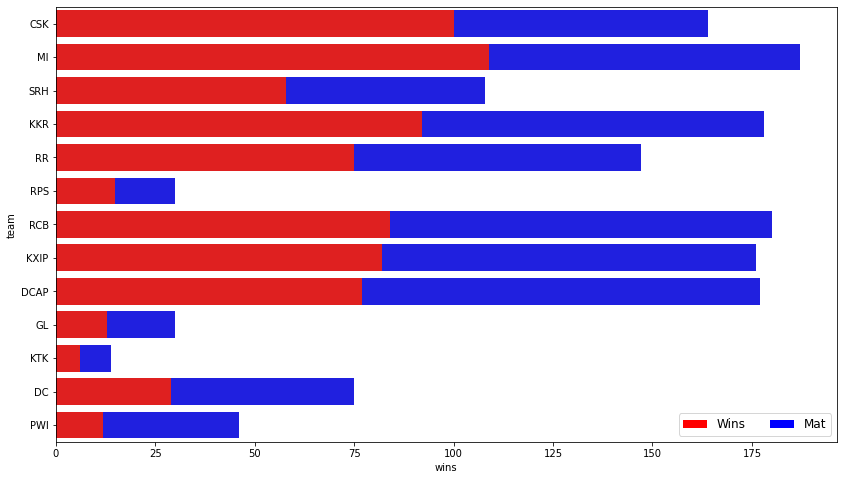

In [21]:
fig=plt.figure(figsize=(14,8))
ax=sns.barplot(y=teamwinper['team'],x=teamwinper['matches'], data=teamwinper, color='blue')
ax1=sns.barplot(y=teamwinper['team'],x=teamwinper['wins'], data=teamwinper, color='red')
topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Wins', 'Mat'], loc=4, ncol = 2, prop={'size':12})

C:\Users\Parnal\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



Text(0, 0.5, 'Matches')

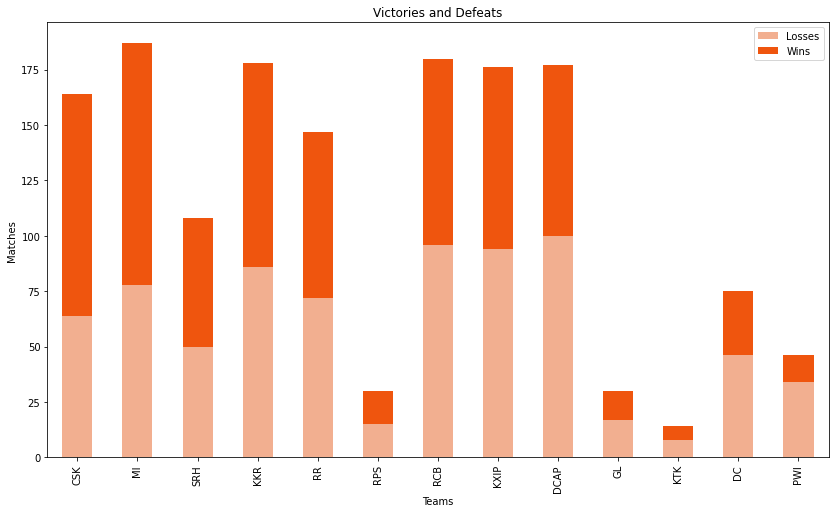

In [22]:
pal = ["#F2AF90", "#EF550E"]
teamwinper.plot(x="team",y=["losses","wins"], kind="bar", colors=pal, stacked=True, figsize=(14,8)).legend(['Losses','Wins'])
plt.title("Victories and Defeats", size=12)
plt.xlabel("Teams")
plt.ylabel("Matches")

In [23]:
tmwin = matches[['team1','team2','toss_winner','winner']]
tmwin['tosseffect'] = np.where(tmwin['toss_winner']==tmwin['winner'], 1, 0)
tmwin['batfirstresult'] = np.where(tmwin['team1']==tmwin['winner'], 1, 0)
tmwin.head()

C:\Users\Parnal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Parnal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,team1,team2,toss_winner,winner,tosseffect,batfirstresult
0,SRH,RCB,RCB,SRH,0,1
1,MI,RPS,RPS,RPS,1,0
2,GL,KKR,KKR,KKR,1,0
3,RPS,KXIP,KXIP,KXIP,1,0
4,RCB,DCAP,RCB,RCB,1,1


([<matplotlib.patches.Wedge at 0x26b0cf4c348>,
 [Text(-1.0978637108473188, -0.0685220577956828, 'Toss won, match won'),
  Text(1.1477666135020308, 0.07163658932472948, 'Toss won, match lost')],
 [Text(-0.5988347513712647, -0.03737566788855425, '52.0%'),
  Text(0.6487376511098435, 0.04049024614006449, '48.0%')])

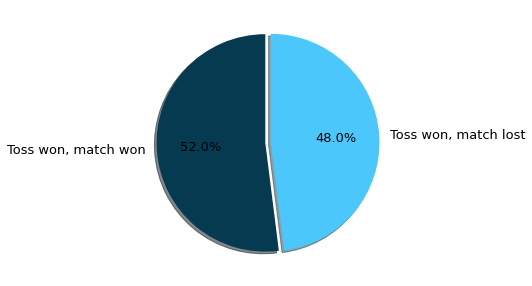

In [24]:
#Toss decision hasn't had much of an impact on the outcome of the game
fig=plt.figure(figsize=(12,5))
labels = ['Toss won, match won', 
         'Toss won, match lost']
slices = [393, 363]
explode=(0.1,0)
plt.rcParams['font.size'] = 13
plt.pie(slices, labels = labels, startangle=90,shadow=True,explode=(0,0.05), autopct='%1.1f%%', colors=['#063A50','#4BC7FB'])

([<matplotlib.patches.Wedge at 0x26b0cf9e4c8>,
 [Text(-1.0824854190693043, 0.19551295993450912, 'Match Won Batting First'),
  Text(1.1316893208915686, -0.20439980670240498, 'Match Won Chasing')],
 [Text(-0.5904465922196204, 0.10664343269155042, '44.3%'),
  Text(0.6396504857213213, -0.11553032552744627, '55.7%')])

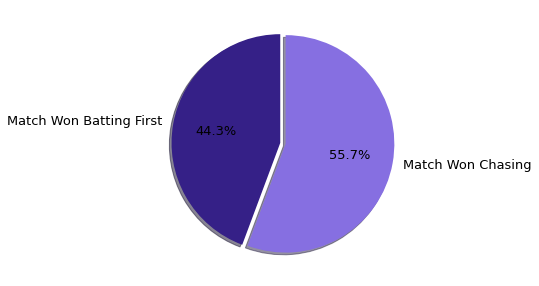

In [25]:
#Teams have a slightly higher probability to win while chasing
fig=plt.figure(figsize=(12,5))
labels = ['Match Won Batting First', 
         'Match Won Chasing']
slices = [335, 421]
plt.pie(slices, labels = labels, startangle=90,shadow=True,explode=(0,0.05), autopct='%1.1f%%', colors=['#352087','#866FE1'])

([<matplotlib.patches.Wedge at 0x26b0c622308>,
 [Text(-1.0922866582947524, 0.13003790259490988, 'Match Won Batting First'),
  Text(1.1419360391251623, -0.13594882326499277, 'Match Won Chasing')],
 [Text(-0.5957927227062284, 0.07092976505176901, '46.2%'),
  Text(0.6454421090707437, -0.07684063923673504, '53.8%')])

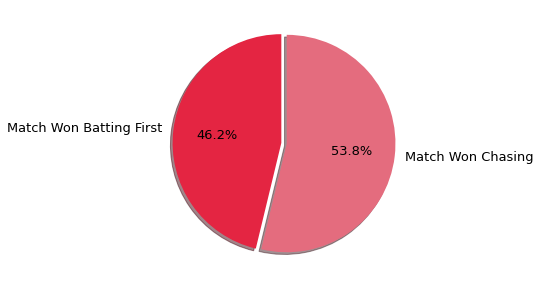

In [26]:
#As we can see, even from 2008-2015, teams chasing first didn't have a great success rate
x=['2008', '2009', '2010','2011', '2012','2013','2014','2015']
tmwintill2015 = matches[matches['season'].isin(x)]
tmwintill2015 = tmwintill2015[['team1','team2','toss_winner','winner']]
tmwintill2015['tosseffect'] = np.where(tmwintill2015['toss_winner']==tmwintill2015['winner'], 1, 0)
tmwintill2015['batfirstresult'] = np.where(tmwintill2015['team1']==tmwintill2015['winner'], 1, 0)
fig=plt.figure(figsize=(12,5))
labels = ['Match Won Batting First', 
         'Match Won Chasing']
slices = [239, 278]
plt.pie(slices, labels = labels, startangle=90,shadow=True,explode=(0,0.05), autopct='%1.1f%%', colors=['#E42542','#E46C7E'])

In [27]:
mat = matches
mat['toss_decision1'] = np.where(mat['toss_decision']=='bat', 1, 0)
toss_teamwise = pd.DataFrame(mat.groupby('toss_winner')['toss_decision1'].sum()).reset_index()
temp = pd.DataFrame(mat['toss_winner'].value_counts()).reset_index().rename(columns={'index':'toss_winner','toss_winner':'counts'})
toss_teamwise = pd.merge(toss_teamwise, temp, on='toss_winner')
toss_teamwise = toss_teamwise.rename(columns={'toss_decision1':'bat first'})
toss_teamwise['bowl first'] = toss_teamwise['counts'] - toss_teamwise['bat first'] 
toss_teamwise.head()
# pd.DataFrame(matches.groupby('toss_winner')['toss_decision'].count())

,toss_winner,bat first,counts,bowl first
0,CSK,48,89,41
1,DC,24,43,19
2,DCAP,31,90,59
3,GL,1,15,14
4,KKR,30,92,62


Text(0, 0.5, 'Toss Decision')

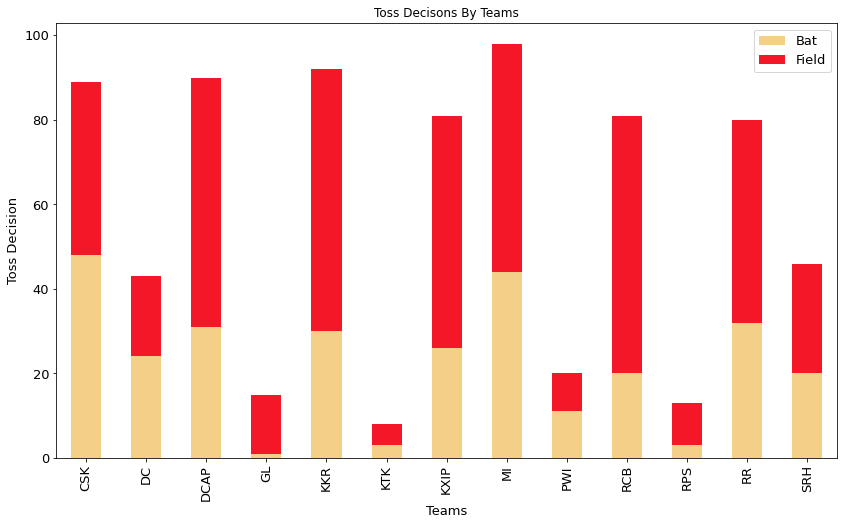

In [28]:
#CSK prefer batting first whereas most of the other regular teams prefer bowling first. Now, we'll look into which team wins the match
#after winning the toss
pal=['#F3CF87','#F31727']
toss_teamwise.plot(x="toss_winner",y=["bat first","bowl first"], kind="bar", colors = pal, stacked=True, figsize=(14,8)).legend(['Bat','Field'])
plt.title("Toss Decisons By Teams", size=12)
plt.xlabel("Teams")
plt.ylabel("Toss Decision")

In [29]:
mat['toss_win_team_win'] = np.where(mat['toss_winner']==mat['winner'],1,0)
toss_win_team_win = pd.DataFrame(mat.groupby('toss_winner')['toss_win_team_win'].sum()).reset_index()
temp1 = pd.DataFrame(mat['toss_winner'].value_counts()).reset_index().rename(columns={'index':'toss_winner','toss_winner':'counts'})
toss_win_team_win = pd.merge(toss_win_team_win, temp, on='toss_winner')
toss_win_team_win['toss_win_team_lost'] = toss_win_team_win['counts'] - toss_win_team_win['toss_win_team_win']
toss_win_team_win.head()
# temp1.head()

,toss_winner,toss_win_team_win,counts,toss_win_team_lost
0,CSK,57,89,32
1,DC,19,43,24
2,DCAP,42,90,48
3,GL,10,15,5
4,KKR,53,92,39


Text(0, 0.5, 'Toss Decision Effect')

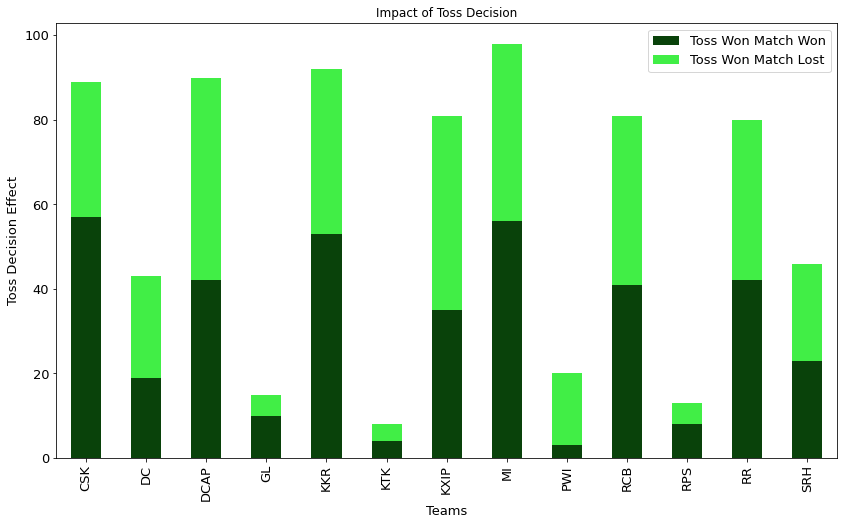

In [30]:
#CSK, MI and KKR have a higher probability of winning the game after winning the toss
pal=['#09420A','#41EE46']
toss_win_team_win.plot(x="toss_winner",y=["toss_win_team_win","toss_win_team_lost"], kind="bar", colors=pal, stacked=True, figsize=(14,8)).legend(['Toss Won Match Won','Toss Won Match Lost'])
plt.title("Impact of Toss Decision", size=12)
plt.xlabel("Teams")
plt.ylabel("Toss Decision Effect")

In [31]:
mat['bat_first_team_win'] = np.where(mat['team1']==mat['winner'],1,0)
mat['bowl_first_team_win'] = np.where(mat['team2']==mat['winner'],1,0)
bat_first_team_win = pd.DataFrame(mat.groupby('team1')['bat_first_team_win'].sum()).reset_index()
bowl_first_team_win = pd.DataFrame(mat.groupby('team1')['bowl_first_team_win'].sum()).reset_index()
bat_first_team_win = pd.merge(bat_first_team_win, bowl_first_team_win, on="team1")
temp2 = pd.DataFrame(mat['team1'].value_counts()).reset_index().rename(columns={'index':'team1','team1':'bat_first'})
temp3 = pd.DataFrame(mat['team2'].value_counts()).reset_index().rename(columns={'index':'team1','team2':'bowl_first'})
bat_first_team_win = pd.merge(bat_first_team_win, temp2, on="team1")
bat_first_team_win = pd.merge(bat_first_team_win, temp3, on="team1")
bat_first_team_win['bat_first_lost'] = bat_first_team_win['bat_first'] - bat_first_team_win['bat_first_team_win']
bat_first_team_win['bowl_first_lost'] = bat_first_team_win['bowl_first'] - bat_first_team_win['bowl_first_team_win']
# bat_first_team_win.head()
bat_first_team_win

,team1,bat_first_team_win,bowl_first_team_win,bat_first,bowl_first,bat_first_lost,bowl_first_lost
0,CSK,51,38,89,75,38,37
1,DC,18,25,43,32,25,7
2,DCAP,28,48,78,99,50,51
3,GL,1,13,14,16,13,3
4,KKR,34,49,83,95,49,46
5,KTK,2,5,7,7,5,2
6,KXIP,38,53,91,85,53,32
7,MI,58,43,101,86,43,43
8,PWI,6,14,20,26,14,12
9,RCB,35,48,85,95,50,47


Text(0, 0.5, 'Batting First Impact')

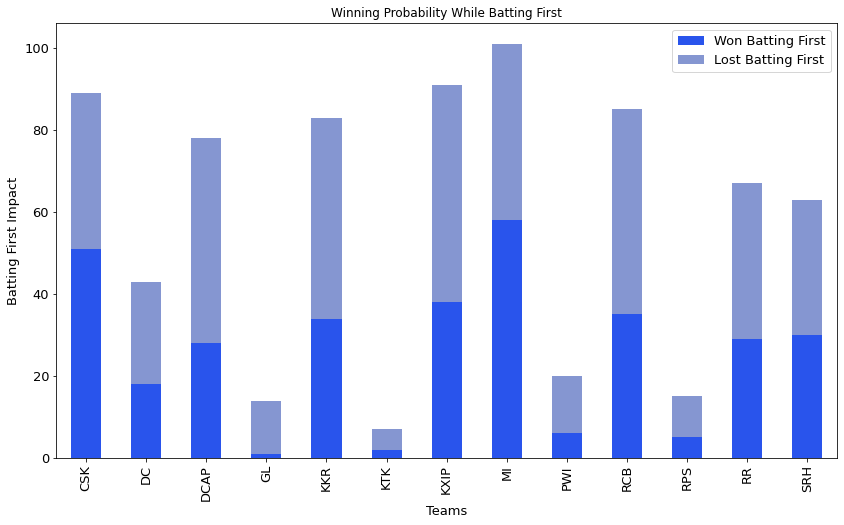

In [32]:
#CSK and MI tend win the games in which they bat first
pal=['#2954EC','#8596D1']
bat_first_team_win.plot(x="team1",y=["bat_first_team_win","bat_first_lost"], kind="bar", colors=pal, stacked=True, figsize=(14,8)).legend(['Won Batting First','Lost Batting First'])
plt.title("Winning Probability While Batting First", size=12)
plt.xlabel("Teams")
plt.ylabel("Batting First Impact")

Text(0, 0.5, 'Bowling First Impact')

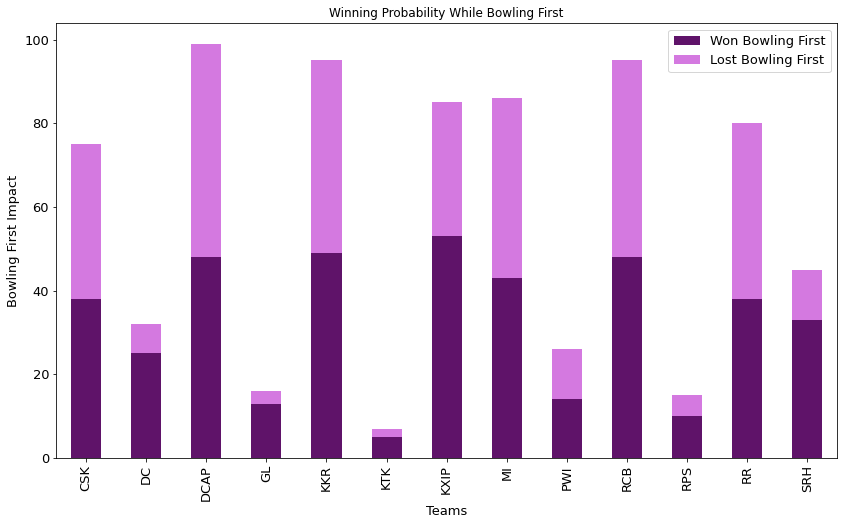

In [33]:
pal = ['#5F1369','#D479E0']
bat_first_team_win.plot(x="team1",y=["bowl_first_team_win","bowl_first_lost"], kind="bar", colors =pal, stacked=True, figsize=(14,8)).legend(['Won Bowling First','Lost Bowling First'])
plt.title("Winning Probability While Bowling First", size=12)
plt.xlabel("Teams")
plt.ylabel("Bowling First Impact")

In [34]:
def team_comp(x,y,d,e):
    a=[x,y]
    mat_new1 = mat[mat['team1'].isin(a) & mat['team2'].isin(a)][['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match']]
    b=[d,e]
    mat_new2 = mat[mat['team1'].isin(b) & mat['team2'].isin(b)][['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match']]
    fig, (ax1,ax2) =plt.subplots(1,2, figsize=(16,6))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
    sns.countplot(x='winner', data=mat_new1, ax=ax1)
    plt.yticks(np.arange(0,20,1))
    
    sns.countplot(x='winner', data=mat_new2, ax=ax2)
    plt.yticks(np.arange(0,20,1))

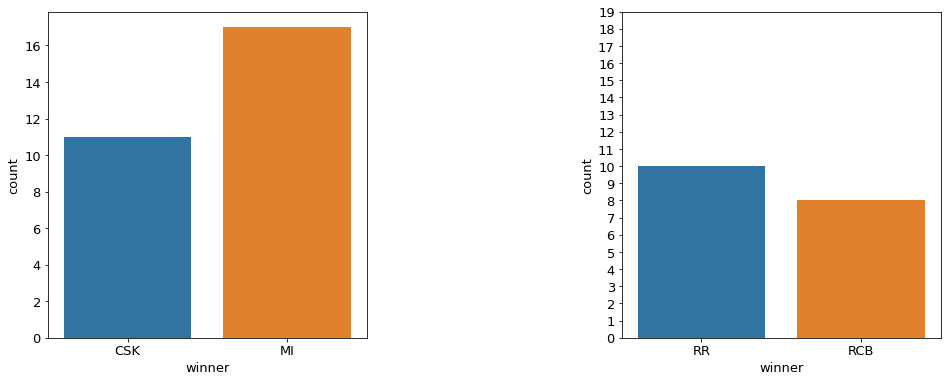

In [35]:
team_comp('MI','CSK','RR','RCB')

In [36]:
def team_comp(x,y,d,e):
    a=[x,y]
    mat_new1 = mat[mat['team1'].isin(a) & mat['team2'].isin(a)][['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match']]
    b=[d,e]
    mat_new2 = mat[mat['team1'].isin(b) & mat['team2'].isin(b)][['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match']]
    fig, (ax1,ax2) =plt.subplots(1,2, figsize=(16,6))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
    sns.countplot(x='season', hue='winner', data=mat_new1, ax=ax1)
    ax1.set_yticks(np.arange(0,6,1))
    ax1.set_xlabel('Season')
    ax1.set_ylabel('Win Count')
#     ax1.legend(bbox_to_anchor = (0.41,0.52,0.6,0.5))
    ax1.legend(loc=1)
    ax1.tick_params(labelsize=10)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
    
    sns.countplot(x='season', hue='winner', data=mat_new2, ax=ax2)
    ax2.set_yticks(np.arange(0,6,1))
    plt.xticks(rotation='vertical')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('Win Count')
    ax2.legend(loc=1)
    ax2.tick_params(labelsize=10)
    for tick in ax2.get_xticklabels():
        tick.set_rotation(90)

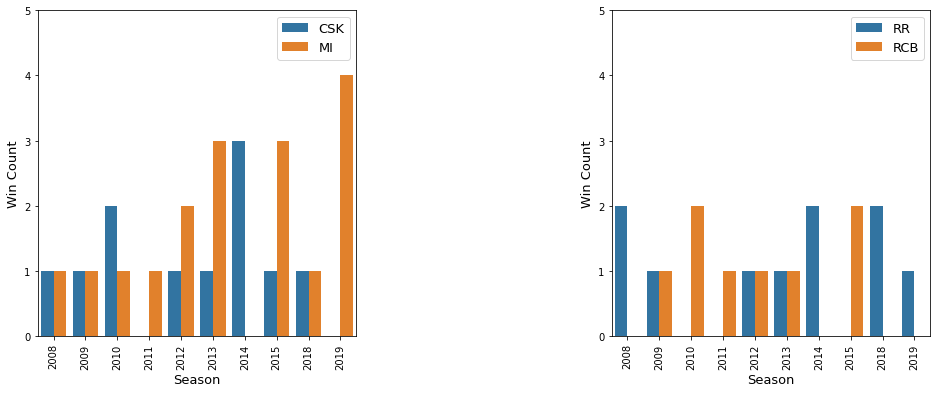

In [37]:
team_comp('MI','CSK','RR','RCB')

In [38]:
deliv = deliveries
a = mat.rename(columns={'id':'match_id'})
deliv = pd.merge(deliv, a[['match_id','season']], on='match_id')
deliv['out'] = np.where(pd.isnull(deliv['player_dismissed']),0,1)
deliv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,out
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,2017,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,2017,0


In [39]:
overall_bat = deliv.groupby('batting_team').sum().reset_index()
overall_bat['runs/wick'] = (overall_bat['total_runs']/overall_bat['out']).round(1)
overall_bat = overall_bat.sort_values(by='runs/wick', ascending=False)

temp_overall_bat = deliv.groupby('batting_team').count().reset_index()
temp_overall_bat = temp_overall_bat.rename(columns={'ball':'ball_count'})
overall_bat = pd.merge(overall_bat, temp_overall_bat[['batting_team','ball_count']], on='batting_team')

overall_bat['team_strikerate'] = ((overall_bat['total_runs']/overall_bat['ball_count'])*100).round()
overall_bat.head()



overall_bowl = deliv.groupby('bowling_team').sum().reset_index()
overall_bowl['runs/wick'] = (overall_bowl['total_runs']/overall_bowl['out']).round(1)
overall_bowl = overall_bowl.sort_values(by='runs/wick', ascending=False)


temp_overall_bowl = deliv.groupby('bowling_team').count().reset_index()
temp_overall_bowl = temp_overall_bowl.rename(columns={'ball':'ball_count'})
overall_bowl = pd.merge(overall_bowl, temp_overall_bowl[['bowling_team','ball_count']], on='bowling_team')


overall_bowl['team_strikerate'] = ((overall_bowl['total_runs']/overall_bowl['ball_count'])*100).round()
overall_bowl.head()

,bowling_team,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,season,out,runs/wick,ball_count,team_strikerate
0,GL,1203688,5125,35824,12711,5,107,10,64,7,0,4902,188,5090,7148360,151,33.7,3545,144.0
1,PWI,1889413,7768,55674,19587,0,174,38,97,26,0,6522,335,6857,10979780,238,28.8,5457,126.0
2,KXIP,38199408,31151,210348,75284,9,807,98,445,103,0,26873,1453,28326,41844171,994,28.5,20782,136.0
3,RCB,37346622,30972,215534,77058,13,877,124,465,92,0,27011,1558,28569,42755564,1036,27.6,21236,135.0
4,KKR,39061195,30244,211788,75522,10,761,115,419,77,0,26003,1372,27375,42165768,1010,27.1,20940,131.0


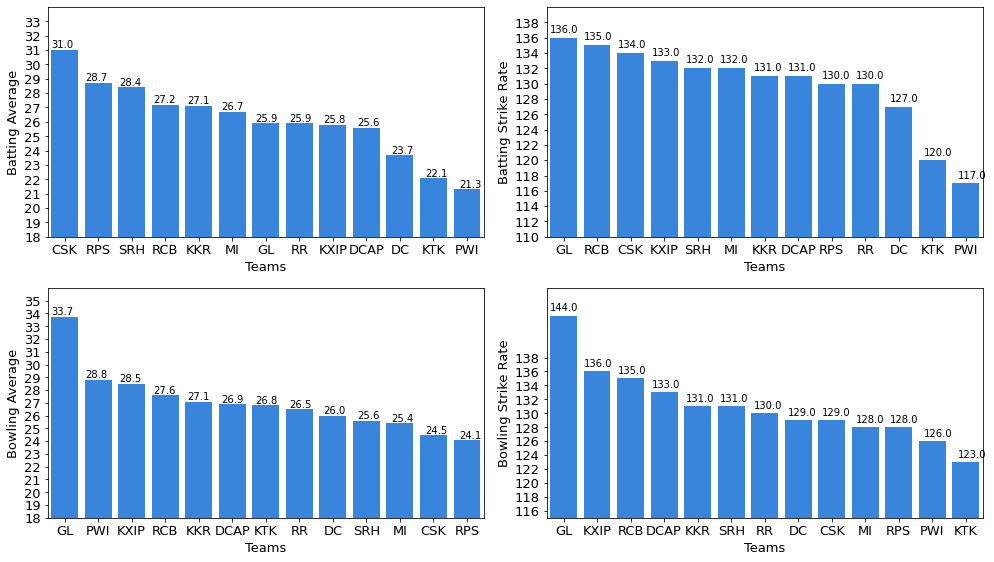

In [40]:
fig, ([ax1,ax2],[ax3,ax4]) =plt.subplots(2,2, figsize=(14,8))
pal = ['#1F83F7']
sns.barplot(y='runs/wick',x='batting_team', data=overall_bat, palette=pal, ax=ax1)
initialx=0
ax1.set_xlabel('Teams')
ax1.set_ylabel('Batting Average')
ax1.set_yticks(np.arange(18,34,1))
ax1.set_ylim([18,34])
plt.tight_layout()
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.005), size=10)
    
sns.barplot(y='team_strikerate',x='batting_team', data=overall_bat.sort_values(by='team_strikerate', ascending=False), palette=pal, ax=ax2)
initialx=0
ax2.set_xlabel('Teams')
ax2.set_ylabel('Batting Strike Rate')
ax2.set_yticks(np.arange(110,140,2))
ax2.set_ylim([110,140])
plt.tight_layout()
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.005), size=10)
    
sns.barplot(y='runs/wick',x='bowling_team', data=overall_bowl.sort_values(by='runs/wick', ascending=False), palette=pal, ax=ax3)
initialx=0
ax3.set_xlabel('Teams')
ax3.set_ylabel('Bowling Average')
ax3.set_yticks(np.arange(18,36,1))
ax3.set_ylim([18,36])
plt.tight_layout()
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.005), size=10)
    
sns.barplot(y='team_strikerate',x='bowling_team', data=overall_bowl.sort_values(by='team_strikerate', ascending=False), palette=pal, ax=ax4)
initialx=0
ax4.set_xlabel('Teams')
ax4.set_ylabel('Bowling Strike Rate')
ax4.set_yticks(np.arange(116,140,2))
ax4.set_ylim([115,148])
plt.tight_layout()
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.005), size=10)

In [41]:
mat_new1 = pd.DataFrame(mat['team1'])
mat_new2 = pd.DataFrame(mat['team2']).rename(columns={'team2':'team1'})
mat_new1 = pd.concat([mat_new1, mat_new2])
mat_count = pd.DataFrame(mat_new1['team1'].value_counts()).reset_index().rename(columns={'index':'bowling_team','team1':'match_count'})
overall_bowl = pd.merge(overall_bowl, mat_count, on='bowling_team')

In [42]:
overall_bowl['wideruns_game'] = (overall_bowl['wide_runs']/overall_bowl['match_count']).round(1)
overall_bowl['byeruns_game'] = (overall_bowl['bye_runs']/overall_bowl['match_count']).round(2)
overall_bowl['legbyeruns_game'] = (overall_bowl['legbye_runs']/overall_bowl['match_count']).round(2)
overall_bowl['noballruns_game'] = (overall_bowl['noball_runs']/overall_bowl['match_count']).round(2)
overall_bowl['extraruns_game'] = (overall_bowl['extra_runs']/overall_bowl['match_count']).round(1)
overall_bowl['wideno_game'] = ((overall_bowl['wide_runs']+overall_bowl['noball_runs'])/(overall_bowl['match_count'])).round(1)
overall_bowl

,bowling_team,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,...,runs/wick,ball_count,team_strikerate,match_count,wideruns_game,byeruns_game,legbyeruns_game,noballruns_game,extraruns_game,wideno_game
0,GL,1203688,5125,35824,12711,5,107,10,64,7,...,33.7,3545,144.0,30,3.6,0.33,2.13,0.23,6.3,3.8
1,PWI,1889413,7768,55674,19587,0,174,38,97,26,...,28.8,5457,126.0,46,3.8,0.83,2.11,0.57,7.3,4.3
2,KXIP,38199408,31151,210348,75284,9,807,98,445,103,...,28.5,20782,136.0,176,4.6,0.56,2.53,0.59,8.3,5.2
3,RCB,37346622,30972,215534,77058,13,877,124,465,92,...,27.6,21236,135.0,180,4.9,0.69,2.58,0.51,8.7,5.4
4,KKR,39061195,30244,211788,75522,10,761,115,419,77,...,27.1,20940,131.0,178,4.3,0.65,2.35,0.43,7.7,4.7
5,DCAP,40350275,29226,209923,74774,6,728,90,467,99,...,26.9,20688,133.0,177,4.1,0.51,2.64,0.56,7.8,4.7
6,KTK,431373,2388,15883,5847,0,56,5,41,8,...,26.8,1614,123.0,14,4.0,0.36,2.93,0.57,7.9,4.6
7,RR,35627825,24996,176140,63020,20,675,100,393,77,...,26.5,17382,130.0,147,4.6,0.68,2.67,0.52,8.5,5.1
8,DC,1910322,14094,92374,32738,0,328,62,215,49,...,26.0,9039,129.0,75,4.4,0.83,2.87,0.65,8.8,5.0
9,SRH,40824841,20022,130801,45842,6,358,42,226,30,...,25.6,12779,131.0,108,3.3,0.39,2.09,0.28,6.1,3.6


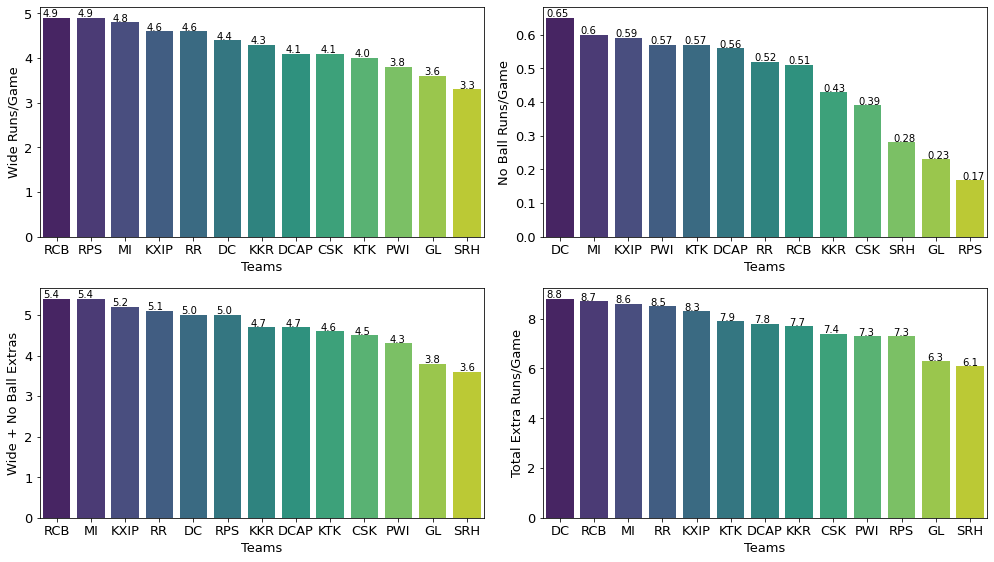

In [43]:
fig, ([ax1,ax2],[ax3,ax4]) =plt.subplots(2,2, figsize=(14,8))
sns.barplot(y='wideruns_game',x='bowling_team', data=overall_bowl.sort_values(by='wideruns_game', ascending=False), palette='viridis', ax=ax1)
initialx=0
ax1.set_xlabel('Teams')
ax1.set_ylabel('Wide Runs/Game')
plt.tight_layout()
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.005), size=10)
    
sns.barplot(y='noballruns_game',x='bowling_team', data=overall_bowl.sort_values(by='noballruns_game', ascending=False), palette='viridis', ax=ax2)
initialx=0
ax2.set_xlabel('Teams')
ax2.set_ylabel('No Ball Runs/Game')
plt.tight_layout()
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.005), size=10)
    
sns.barplot(y='wideno_game',x='bowling_team', data=overall_bowl.sort_values(by='wideno_game', ascending=False), palette='viridis', ax=ax3)
initialx=0
ax3.set_xlabel('Teams')
ax3.set_ylabel('Wide + No Ball Extras')
plt.tight_layout()
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.005), size=10)
    
sns.barplot(y='extraruns_game',x='bowling_team', data=overall_bowl.sort_values(by='extraruns_game', ascending=False), palette='viridis', ax=ax4)
initialx=0
ax4.set_xlabel('Teams')
ax4.set_ylabel('Total Extra Runs/Game')
plt.tight_layout()
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.005), size=10)

In [44]:
overall_seasonbat = deliv.groupby('season').sum().reset_index()
overall_seasonbat['runs/wick'] = (overall_seasonbat['total_runs']/overall_seasonbat['out']).round(1)

temp_overall_season = deliv.groupby('season').count().reset_index()
temp_overall_season = temp_overall_season.rename(columns={'ball':'ball_count'})
overall_seasonbat = pd.merge(overall_seasonbat, temp_overall_season[['season','ball_count']], on='season')
overall_seasonbat['team_strikerate'] = ((overall_seasonbat['total_runs']/overall_seasonbat['ball_count'])*100).round()

# temp_overall_season.head()
overall_seasonbat.head()

,season,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,out,runs/wick,ball_count,team_strikerate
0,2008,1192421,19913,134400,49034,0,596,73,372,82,5,16809,1128,17937,690,26.0,13489,133.0
1,2009,1992892,20206,138093,49368,11,523,77,299,78,0,15376,977,16353,698,23.4,13606,120.0
2,2010,2962761,21518,147826,52620,9,639,82,334,74,0,17754,1129,18883,725,26.0,14498,130.0
3,2011,4603120,25163,171283,61543,0,644,121,375,86,0,19928,1226,21154,813,26.0,17013,124.0
4,2012,6125497,26438,182051,64074,0,609,88,371,63,0,21322,1131,22453,858,26.2,17767,126.0


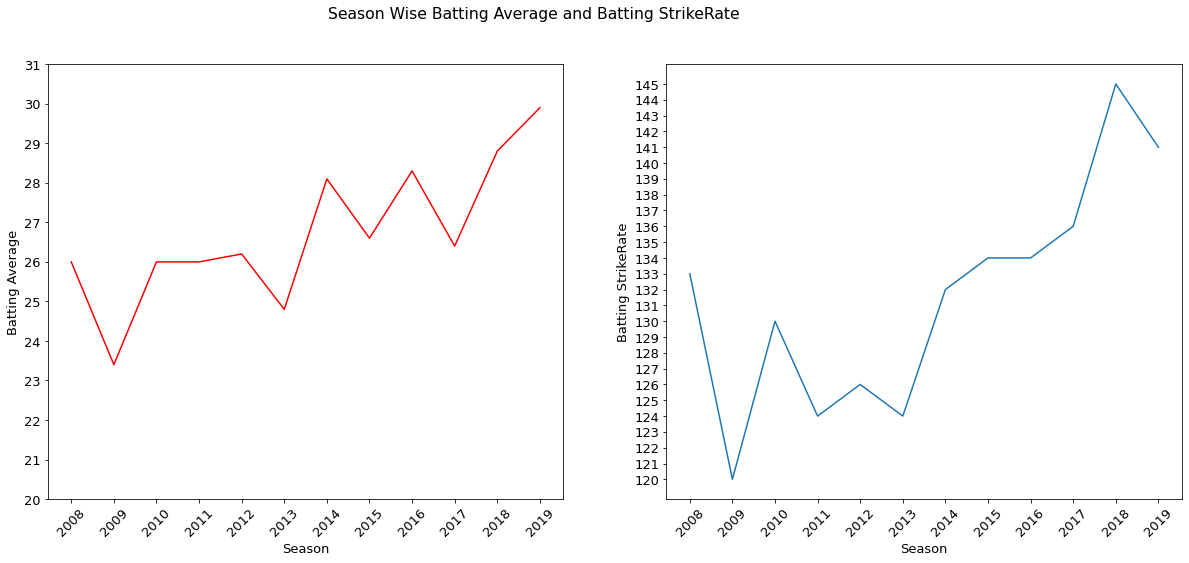

In [45]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(18,8))
sns.lineplot(y='runs/wick',x='season', data=overall_seasonbat, color='r', ax=ax1)
plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=None, hspace=None)
initialx=0
fig.suptitle('Season Wise Batting Average and Batting StrikeRate')
ax1.set_xlabel('Season')
ax1.set_ylabel('Batting Average')
# plt.tight_layout()
ax1.set_yticks(np.arange(20,32,1))
ax1.set_xticks(np.arange(2008,2020,1))
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
sns.lineplot(y='team_strikerate',x='season', data=overall_seasonbat, palette='viridis', ax=ax2)
initialx=0
ax2.set_xlabel('Season')
ax2.set_ylabel('Batting StrikeRate')
ax2.set_yticks(np.arange(120,146,1))
ax2.set_xticks(np.arange(2008,2020,1))
# plt.tight_layout()
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

In [46]:
overall_batseason = deliv.groupby(['season','batting_team']).sum().reset_index()
overall_batseason['runs/wick'] = (overall_batseason['total_runs']/overall_batseason['out']).round(1)

temp_overall_batseason = deliv.groupby(['season','batting_team']).count().reset_index()
temp_overall_batseason = temp_overall_batseason.rename(columns={'ball':'ball_count'})
overall_batseason = pd.merge(overall_batseason, temp_overall_batseason[['batting_team','ball_count']], on='batting_team')
overall_batseason['team_strikerate'] = ((overall_batseason['total_runs']/overall_batseason['ball_count'])*100).round()

overall_batseason.head()

,season,batting_team,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,out,runs/wick,ball_count,team_strikerate
0,2008,CSK,169909,2626,18758,6867,0,92,12,38,13,0,2365,155,2520,79,31.9,1874,134.0
1,2008,CSK,169909,2626,18758,6867,0,92,12,38,13,0,2365,155,2520,79,31.9,1709,147.0
2,2008,CSK,169909,2626,18758,6867,0,92,12,38,13,0,2365,155,2520,79,31.9,1951,129.0
3,2008,CSK,169909,2626,18758,6867,0,92,12,38,13,0,2365,155,2520,79,31.9,1947,129.0
4,2008,CSK,169909,2626,18758,6867,0,92,12,38,13,0,2365,155,2520,79,31.9,2183,115.0


Text(0, 0.5, 'Batting StrikeRate')

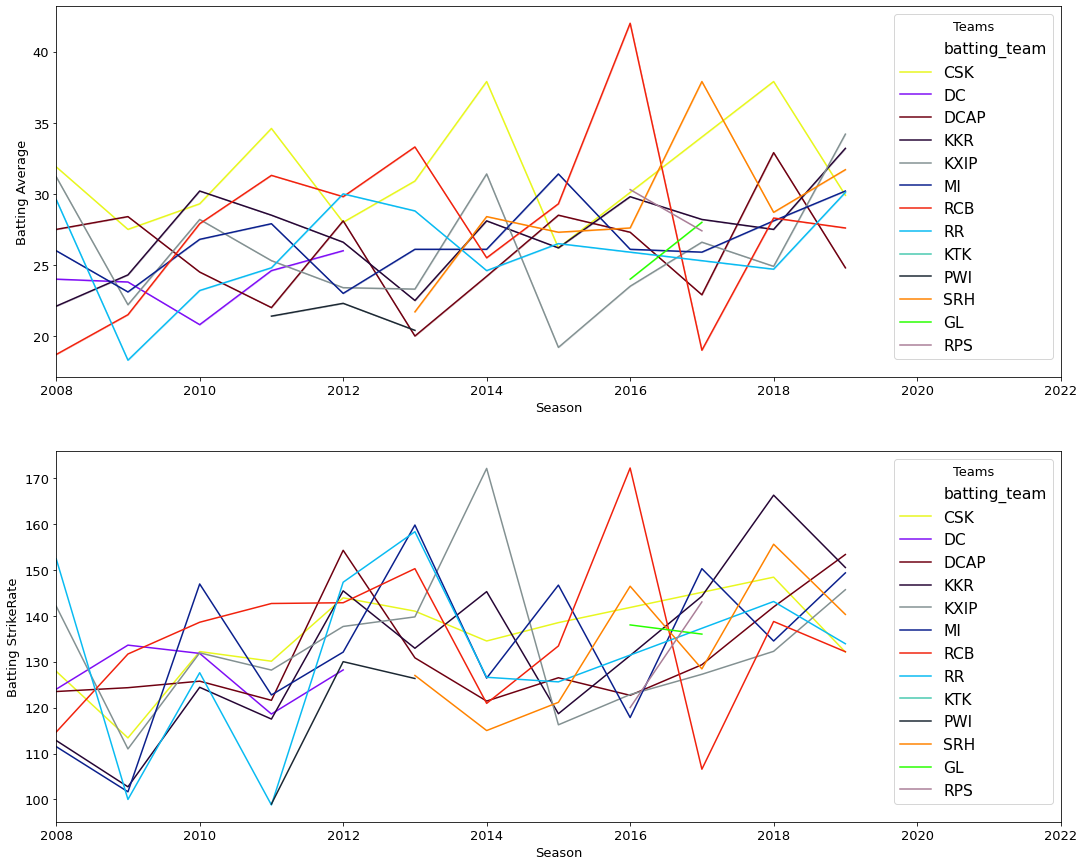

In [47]:
fig, (ax1,ax2) =plt.subplots(2,1, figsize=(18,15))
pal=['#E8F71F','#7F0EF5','#6F0011','#260635','#839192','#0B208D','#F1220D','#09BBF2','#48C9B0','#1C2833','#FF8300','#28FF00','#AA7F98',]
sns.lineplot(x='season', y='runs/wick', hue='batting_team', palette=pal, data=overall_batseason, ax=ax1)
ax1.legend(title = 'Teams', loc = 1, fontsize = 15.5)
ax1.set_xlim([2008,2022])
ax1.set_xlabel('Season')
ax1.set_ylabel('Batting Average')

sns.lineplot(x='season', y='team_strikerate', hue='batting_team', palette=pal, ci=None, data=overall_batseason, ax=ax2)
ax2.legend(title = 'Teams', loc = 1, fontsize = 15.5)
ax2.set_xlim([2008,2022])
ax2.set_xlabel('Season')
ax2.set_ylabel('Batting StrikeRate')

In [132]:
batsman = deliv.groupby('batsman').sum().reset_index()
temp10 = deliv.groupby('batsman').count().reset_index().rename(columns={'ball':'ball_count'})
batsman = pd.merge(batsman, temp10[['batsman','ball_count']], on='batsman')
# batsman['batting_SR'] = ((batsman['batsman_runs']/batsman['ball_count'])*100).round(2)
temp11 = pd.DataFrame(deliv['player_dismissed'].value_counts()).reset_index().rename(columns={'index':'batsman','player_dismissed':'counts'})
batsman = pd.merge(batsman, temp11, on='batsman').rename(columns={'counts':'bat_out'})
batsman['batting_average'] = (batsman['batsman_runs']/batsman['bat_out']).round(2)
tempalls = deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().rename(columns={'batsman_runs':'4s'})
temp6s = deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().rename(columns={'batsman_runs':'6s'})
temp1s = deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==1).sum()).reset_index().rename(columns={'batsman_runs':'1s'})
temp2s = deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==2).sum()).reset_index().rename(columns={'batsman_runs':'2s'})
temp3s = deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==3).sum()).reset_index().rename(columns={'batsman_runs':'3s'})
temp5s = deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==5).sum()).reset_index().rename(columns={'batsman_runs':'5s'})
temp7s = deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==7).sum()).reset_index().rename(columns={'batsman_runs':'7s'})
temp0s = deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().rename(columns={'batsman_runs':'0s'})
tempalls = pd.merge(tempalls, temp6s, on='batsman')
tempalls = pd.merge(tempalls, temp1s, on='batsman')
tempalls = pd.merge(tempalls, temp2s, on='batsman')
tempalls = pd.merge(tempalls, temp3s, on='batsman')
tempalls = pd.merge(tempalls, temp5s, on='batsman')
tempalls = pd.merge(tempalls, temp7s, on='batsman')
tempalls = pd.merge(tempalls, temp0s, on='batsman')

batsman = pd.merge(batsman, tempalls, on='batsman')
batsman = batsman[['batsman','wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'ball_count','bat_out', 'batting_average', '4s', '6s',
       '1s', '2s', '3s', '5s', '7s', '0s']]
batsman['actual_ballsfaced'] = batsman['ball_count'] - batsman['wide_runs']
batsman['dots'] = batsman['actual_ballsfaced'] - (batsman['4s'] + batsman['6s'] + batsman['1s'] + batsman['2s'] + batsman['3s']
                                           + batsman['5s'] + batsman['7s']
                                           + batsman['legbye_runs'] + batsman['bye_runs'])
batsman['batting_SR'] = ((batsman['batsman_runs']/(batsman['ball_count'] - batsman['wide_runs']))*100).round(2)
batsman['dotper'] = ((batsman['dots']/batsman['actual_ballsfaced'])*100).round(2)
batsman['4sper'] = ((batsman['4s']/batsman['actual_ballsfaced'])*100).round(2)
batsman['6sper'] = ((batsman['6s']/batsman['actual_ballsfaced'])*100).round(2)
batsman['boundaryper'] = (((batsman['6s'] + batsman['4s'])/batsman['actual_ballsfaced'])*100).round(2)
batsman['SR_rating'] = ((((batsman['batting_SR'] - 0) * (100 - 0))/(203-0)) + 0).round(2)
batsman['Avg_rating'] = ((((batsman['batting_average'] - 0) * (100 - 0))/(59-0)) + 0).round(1)
batsman['IPL_rating'] = ((batsman['SR_rating'] + batsman['Avg_rating'])/2).round(1)
batsman['avg_str_rating'] = ((0.6*batsman['Avg_rating'] + 0.4*batsman['SR_rating'])*1.35).round(1)
batsman['str_avg_rating'] = ((0.4*batsman['Avg_rating'] + 0.6*batsman['SR_rating'])*1.35).round(1)
batsman.head()

,batsman,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,ball_count,...,batting_SR,dotper,4sper,6sper,boundaryper,SR_rating,Avg_rating,IPL_rating,avg_str_rating,str_avg_rating
0,A Ashish Reddy,3,5,0,0,0,280,8,288,196,...,145.08,27.46,8.29,7.77,16.06,71.47,31.6,51.5,64.2,75.0
1,A Chopra,4,0,1,0,0,53,5,58,75,...,74.65,56.34,9.86,0.00,9.86,36.77,15.0,25.9,32.0,37.9
2,A Choudhary,0,0,0,0,0,25,0,25,20,...,125.00,20.00,5.00,5.00,10.00,61.58,42.4,52.0,67.6,72.8
3,A Flintoff,4,0,6,0,0,62,10,72,57,...,116.98,26.42,9.43,3.77,13.21,57.63,52.5,55.1,73.6,75.0
4,A Hales,2,0,1,1,0,152,4,156,119,...,129.91,36.75,11.11,5.13,16.24,64.00,42.9,53.4,69.3,75.0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'Batting Average')

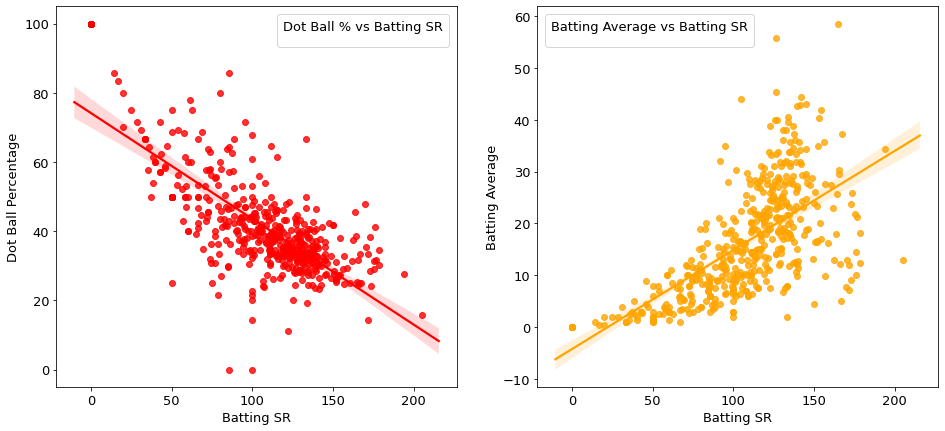

In [63]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(14,7))
sns.regplot(x='batting_SR', y='dotper', data=batsman, color='red', ax=ax1)
plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=None, hspace=1)
ax1.legend(title = 'Dot Ball % vs Batting SR', loc = 1, fontsize = 15.5)
ax1.set_xlabel('Batting SR')
ax1.set_ylabel('Dot Ball Percentage')

sns.regplot(x='batting_SR', y='batting_average', data=batsman, color='orange', ax=ax2)
ax2.legend(title = 'Batting Average vs Batting SR', loc = 0, fontsize = 15.5)
ax2.set_xlabel('Batting SR')
ax2.set_ylabel('Batting Average')

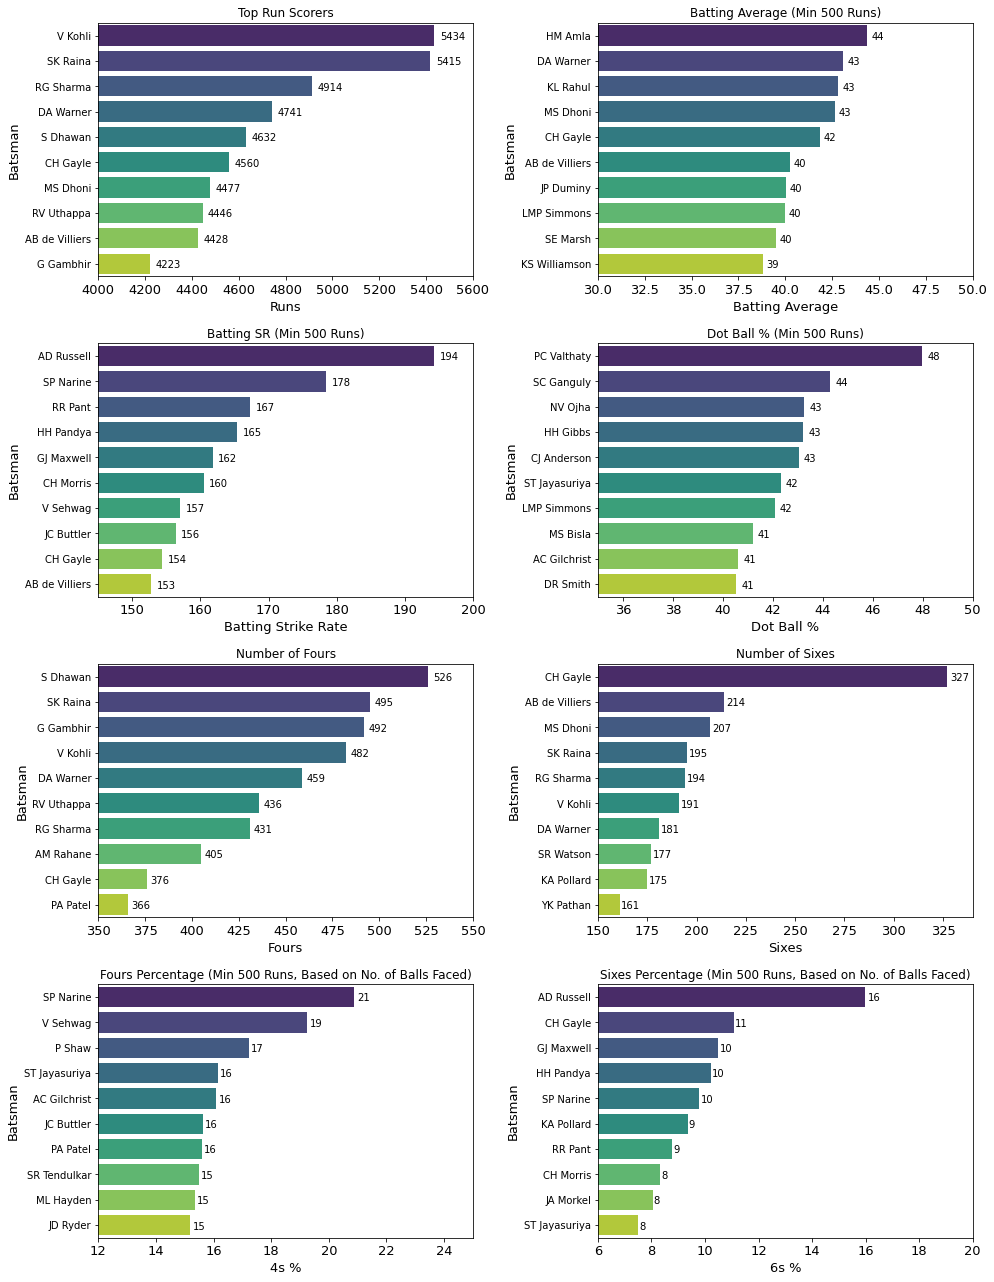

In [64]:
fig, ([ax1,ax2],[ax3,ax4], [ax5,ax6], [ax7,ax8]) =plt.subplots(4,2, figsize=(14,18))
sns.barplot(y='batsman',x='batsman_runs', data=batsman
            .sort_values(by='batsman_runs', ascending=False)[:10], palette='viridis', ax=ax1)
initialx=0
ax1.set_xlabel('Runs')
ax1.set_ylabel('Batsman')
ax1.tick_params(axis="y", labelsize=10)
ax1.set_xlim([4000,5600])
ax1.set_title('Top Run Scorers', size=12)
plt.tight_layout()
for p in ax1.patches:
    ax1.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()),size=10)
    initialx+=1
    

sns.barplot(y='batsman',x='batting_average', data=batsman[batsman['batsman_runs']>500]
            .sort_values(by='batting_average', ascending=False)[:10], palette='viridis', ax=ax2)
initialx=0
ax2.set_xlabel('Batting Average')
ax2.set_ylabel('Batsman')
ax2.tick_params(axis="y", labelsize=10)
ax2.set_xlim([30,50])
ax2.set_title('Batting Average (Min 500 Runs)', size=12)
plt.tight_layout()
for p in ax2.patches:
    ax2.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()),size=10)
    initialx+=1

    
    
sns.barplot(y='batsman',x='batting_SR', data=batsman[batsman['batsman_runs']>500]
            .sort_values(by='batting_SR', ascending=False)[:10], palette='viridis', ax=ax3)
initialx=0
ax3.set_xlabel('Batting Strike Rate')
ax3.set_ylabel('Batsman')
ax3.tick_params(axis="y", labelsize=10)
ax3.set_xlim([145,200])
ax3.set_title('Batting SR (Min 500 Runs)', size=12)
plt.tight_layout()
for p in ax3.patches:
    ax3.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()),size=10)
    initialx+=1
    
sns.barplot(y='batsman',x='dotper', data=batsman[batsman['batsman_runs']>500]
            .sort_values(by='dotper', ascending=False)[:10], palette='viridis', ax=ax4)
initialx=0
ax4.set_xlabel('Dot Ball %')
ax4.set_ylabel('Batsman')
ax4.tick_params(axis="y", labelsize=10)
ax4.set_xlim([35,50])
ax4.set_title('Dot Ball % (Min 500 Runs)', size=12)
plt.tight_layout()
for p in ax4.patches:
    ax4.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()),size=10)
    initialx+=1
    
sns.barplot(y='batsman',x='4s', data=batsman
            .sort_values(by='4s', ascending=False)[:10], palette='viridis', ax=ax5)
initialx=0
ax5.set_xlabel('Fours')
ax5.set_ylabel('Batsman')
ax5.tick_params(axis="y", labelsize=10)
ax5.set_xlim([350,550])
ax5.set_title('Number of Fours', size=12)
plt.tight_layout()
for p in ax5.patches:
    ax5.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()),size=10)
    initialx+=1
    
sns.barplot(y='batsman',x='6s', data=batsman
            .sort_values(by='6s', ascending=False)[:10], palette='viridis', ax=ax6)
initialx=0
ax6.set_xlabel('Sixes')
ax6.set_ylabel('Batsman')
ax6.tick_params(axis="y", labelsize=10)
ax6.set_xlim([150,340])
ax6.set_title('Number of Sixes', size=12)
plt.tight_layout()
for p in ax6.patches:
    ax6.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()),size=10)
    initialx+=1

sns.barplot(y='batsman',x='4sper', data=batsman[batsman['batsman_runs']>500]
            .sort_values(by='4sper', ascending=False)[:10], palette='viridis', ax=ax7)
initialx=0
ax7.set_xlabel('4s %')
ax7.set_ylabel('Batsman')
ax7.tick_params(axis="y", labelsize=10)
ax7.set_xlim([12,25])
ax7.set_title('Fours Percentage (Min 500 Runs, Based on No. of Balls Faced)', size=12)
plt.tight_layout()
for p in ax7.patches:
    ax7.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()),size=10)
    initialx+=1

sns.barplot(y='batsman',x='6sper', data=batsman[batsman['batsman_runs']>500]
            .sort_values(by='6sper', ascending=False)[:10], palette='viridis', ax=ax8)
initialx=0
ax8.set_xlabel('6s %')
ax8.set_ylabel('Batsman')
ax8.tick_params(axis="y", labelsize=10)
ax8.set_xlim([6,20])
ax8.set_title('Sixes Percentage (Min 500 Runs, Based on No. of Balls Faced)', size=12)
plt.tight_layout()
for p in ax8.patches:
    ax8.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()),size=10)
    initialx+=1


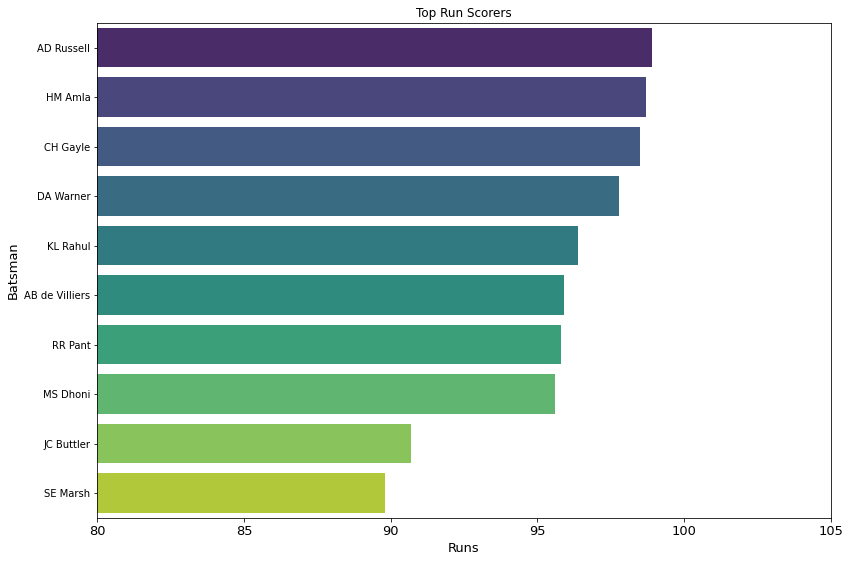

In [146]:
fig=plt.figure(figsize=(12,8))
sns.barplot(y='batsman',x='avg_str_rating', data=batsman[batsman['batsman_runs']>500]
            .sort_values(by='avg_str_rating', ascending=False)[:10], palette='viridis')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.tick_params(axis="y", labelsize=10)
plt.xlim([80,105])
plt.title('Top Run Scorers', size=12)
plt.tight_layout()
initialx=0
for p in ax.patches:
    ax.text(p.get_width()*1.005,initialx+p.get_height()/5,'{:1.0f}'.format(p.get_width()))
    initialx+=1

In [147]:
batsman[batsman['batsman_runs']>500].sort_values(by='avg_str_rating', ascending=False)[:20]

,batsman,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,ball_count,...,batting_SR,dotper,4sper,6sper,boundaryper,SR_rating,Avg_rating,IPL_rating,avg_str_rating,str_avg_rating
31,AD Russell,59,5,14,4,0,1445,82,1527,803,...,194.22,27.69,13.17,15.99,29.17,95.67,58.3,77.0,98.9,109.0
151,HM Amla,12,0,10,1,0,577,23,600,418,...,142.12,31.53,14.78,5.17,19.95,70.01,75.2,72.6,98.7,97.3
85,CH Gayle,178,27,93,15,0,4560,313,4873,3131,...,154.42,38.10,12.73,11.07,23.81,76.07,70.9,73.5,98.5,99.9
104,DA Warner,127,28,63,16,0,4741,234,4975,3398,...,144.94,31.67,14.03,5.53,19.57,71.40,73.1,72.2,97.8,97.3
208,KL Rahul,40,6,24,4,0,2013,74,2087,1465,...,141.26,30.39,12.49,5.68,18.18,69.59,72.6,71.1,96.4,95.6
23,AB de Villiers,79,19,49,8,0,4428,155,4583,2977,...,152.80,27.36,12.32,7.38,19.70,75.27,68.2,71.7,95.9,97.8
349,RR Pant,33,0,27,3,0,1792,63,1855,1104,...,167.32,25.02,14.38,8.78,23.16,82.42,63.3,72.9,95.8,100.9
272,MS Dhoni,106,21,71,16,0,4477,214,4691,3318,...,139.38,28.42,9.25,6.44,15.69,68.66,72.3,70.5,95.6,94.7
175,JC Buttler,39,12,17,2,0,1431,70,1501,954,...,156.39,28.96,15.63,6.67,22.30,77.04,60.6,68.8,90.7,95.1
399,SE Marsh,50,5,63,5,0,2489,123,2612,1913,...,133.60,33.17,14.44,4.19,18.63,65.81,67.0,66.4,89.8,89.5


In [54]:
deliv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,out
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,2017,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,2017,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,2017,0
